In [1]:
using PowerSystems
using JSON3

file_dir = joinpath(pkgdir(PowerSystems), "docs", "src", "tutorials", "tutorials_data"); #hide
sys = System(joinpath(file_dir, "case5_re.m"));

┌ Error: Matlab parser skipping line number 85 consisting of:
│   };
└ @ PowerSystems /home/emco4286/.julia/packages/PowerSystems/9HB30/src/parsers/im_io/matlab.jl:64
┌ Info: Correcting vm in bus 1 to 1.07762 to match generator set-point
└ @ PowerSystems /home/emco4286/.julia/packages/PowerSystems/9HB30/src/parsers/pm_io/matpower.jl:242
┌ Info: Correcting vm in bus 3 to 1.1 to match generator set-point
└ @ PowerSystems /home/emco4286/.julia/packages/PowerSystems/9HB30/src/parsers/pm_io/matpower.jl:242
┌ Info: Correcting vm in bus 4 to 1.06414 to match generator set-point
└ @ PowerSystems /home/emco4286/.julia/packages/PowerSystems/9HB30/src/parsers/pm_io/matpower.jl:242
┌ Info: Correcting vm in bus 10 to 1.06907 to match generator set-point
└ @ PowerSystems /home/emco4286/.julia/packages/PowerSystems/9HB30/src/parsers/pm_io/matpower.jl:242
┌ Info: extending matpower format with data: areas 1x3
└ @ PowerSystems /home/emco4286/.julia/packages/PowerSystems/9HB30/src/parsers/pm_io/matpower

In [2]:
sys

Property,Value
Name,
Description,
System Units Base,SYSTEM_BASE
Base Power,100.0
Base Frequency,60.0
Num Components,30
Type,Count
ACBus,5
Arc,6
Area,1


In [3]:
show_components(sys, ACBus)

ACBus
┌──────┐
│ name │
├──────┤
│ bus1 │
│ bus4 │
│ bus5 │
│ bus2 │
│ bus3 │
└──────┘


In [4]:
show_components(sys, PowerLoad)

PowerLoad
┌──────┬───────────┐
│ name │ available │
├──────┼───────────┤
│ bus4 │ true      │
│ bus3 │ true      │
│ bus2 │ true      │
└──────┴───────────┘


In [4]:
show_components(sys, RenewableDispatch)

RenewableDispatch
┌───────────┬───────────┐
│ name      │ available │
├───────────┼───────────┤
│ SolarBusC │ true      │
│ WindBusA  │ true      │
└───────────┴───────────┘


In [5]:
get_component(PowerSystems.Generator, sys, "WindBusA")

RenewableDispatch: WindBusA:
   name: WindBusA
   available: true
   bus: ACBus: bus5
   active_power: 0.0
   reactive_power: 0.0
   rating: 0.6
   prime_mover_type: PrimeMovers.WT = 22
   reactive_power_limits: (min = 0.0, max = 0.0)
   power_factor: 1.0
   operation_cost: RenewableGenerationCost composed of variable: CostCurve{LinearCurve}, curtailment_cost: CostCurve{LinearCurve}
   base_power: 100.0
   services: 0-element Vector{Service}
   dynamic_injector: nothing
   ext: Dict{String, Any}()
   InfrastructureSystems.SystemUnitsSettings:
      base_value: 100.0
      unit_system: UnitSystem.SYSTEM_BASE = 0
   has_supplemental_attributes: false
   has_time_series: false

In [ ]:
get_component(PowerSystems.PowerLoad, sys, "bus4")

PowerLoad: bus4:
   name: bus4
   available: true
   bus: ACBus: bus4
   active_power: 4.0
   reactive_power: 1.3147
   base_power: 100.0
   max_active_power: 4.0
   max_reactive_power: 1.3147
   services: 0-element Vector{Service}
   dynamic_injector: nothing
   ext: Dict{String, Any}()
   InfrastructureSystems.SystemUnitsSettings:
      base_value: 100.0
      unit_system: UnitSystem.SYSTEM_BASE = 0
   has_supplemental_attributes: false
   has_time_series: true

In [43]:
get_component(ACBus, sys, "bus4")

ACBus: bus4:
   number: 4
   name: bus4
   bustype: ACBusTypes.REF = 3
   angle: 0.0
   magnitude: 1.06414
   voltage_limits: (min = 0.9, max = 1.1)
   base_voltage: 230.0
   area: Area: 1
   load_zone: LoadZone: 1
   ext: Dict{String, Any}()
   InfrastructureSystems.SystemUnitsSettings:
      base_value: 100.0
      unit_system: UnitSystem.SYSTEM_BASE = 0
   has_supplemental_attributes: false
   has_time_series: false

In [8]:
using PowerSystemCaseBuilder #hide
DATA_DIR = PowerSystemCaseBuilder.DATA_DIR #hide
FORECASTS_DIR = joinpath(DATA_DIR, "5-Bus", "5bus_ts"); #hide
# fname = joinpath(FORECASTS_DIR, "timeseries_pointers_da.json"); # hide
# open(fname, "r") do f # hide
#     JSON3.@pretty JSON3.read(f) # hide
# end #hide

"/home/emco4286/.julia/artifacts/afb608473cf4d5eb22147856de1a1a651f36d40b/PowerSystemsTestData-3.1/5-Bus/5bus_ts"

In [9]:
fname = joinpath(FORECASTS_DIR, "timeseries_pointers_da.json")
add_time_series!(sys, fname)

5-element Vector{TimeSeriesKey}:
 StaticTimeSeriesKey(SingleTimeSeries, "max_active_power", Dates.DateTime("2024-11-14T00:00:00"), Dates.Millisecond(3600000), 24, Dict{String, Any}())
 StaticTimeSeriesKey(SingleTimeSeries, "max_active_power", Dates.DateTime("2024-11-14T00:00:00"), Dates.Millisecond(3600000), 24, Dict{String, Any}())
 StaticTimeSeriesKey(SingleTimeSeries, "max_active_power", Dates.DateTime("2024-11-14T00:00:00"), Dates.Millisecond(3600000), 24, Dict{String, Any}())
 StaticTimeSeriesKey(SingleTimeSeries, "max_active_power", Dates.DateTime("2024-11-14T00:00:00"), Dates.Millisecond(3600000), 24, Dict{String, Any}())
 StaticTimeSeriesKey(SingleTimeSeries, "max_active_power", Dates.DateTime("2024-11-14T00:00:00"), Dates.Millisecond(3600000), 24, Dict{String, Any}())

In [12]:
show_time_series(sys)

Time Series Summary
┌───────────────────┬────────────────┬──────────────────┬──────────────────────┬─────────────────────┬───────────────┬───────┐
│ owner_type        │ owner_category │ time_series_type │ time_series_category │ initial_timestamp   │ resolution_ms │ count │
│ String            │ String         │ String           │ String               │ String              │ Int64         │ Int64 │
├───────────────────┼────────────────┼──────────────────┼──────────────────────┼─────────────────────┼───────────────┼───────┤
│ PowerLoad         │ Component      │ SingleTimeSeries │ StaticTimeSeries     │ 2024-11-14T00:00:00 │ 3600000       │ 3     │
│ RenewableDispatch │ Component      │ SingleTimeSeries │ StaticTimeSeries     │ 2024-11-14T00:00:00 │ 3600000       │ 2     │
└───────────────────┴────────────────┴──────────────────┴──────────────────────┴─────────────────────┴───────────────┴───────┘


In [28]:
using Dates
transform_single_time_series!(
    sys,
    Dates.Hour(24), # horizon
    Dates.Hour(1), # interval
);

In [29]:
using PowerSimulations
using HiGHS
solver = optimizer_with_attributes(HiGHS.Optimizer, "mip_rel_gap" => 0.5);
template_uc = template_unit_commitment();
# set_device_model!(template_uc, Line, StaticBranch)
# set_device_model!(template_uc, RenewableDispatch, RenewableFullDispatch)
# set_device_model!(template_uc, PowerLoad, StaticPowerLoad)
# set_network_model!(template_uc, NetworkModel(CopperPlatePowerModel))
problem = DecisionModel(template_uc, sys; optimizer = solver, name = "UC", horizon = Hour(24))
build!(problem, output_dir = mktempdir())

InfrastructureSystems.Optimization.ModelBuildStatusModule.ModelBuildStatus.BUILT = 0

In [30]:
solve!(problem)

InfrastructureSystems.Simulation.RunStatusModule.RunStatus.SUCCESSFULLY_FINALIZED = 0

In [31]:
res = OptimizationProblemResults(problem)

ProductionCostExpression__ThermalStandard
ProductionCostExpression__RenewableDispatch
ActivePowerBalance__System
ActivePowerTimeSeriesParameter__RenewableDispatch
ActivePowerTimeSeriesParameter__PowerLoad
StopVariable__ThermalStandard
StartVariable__ThermalStandard
OnVariable__ThermalStandard
ActivePowerVariable__RenewableDispatch
ActivePowerVariable__ThermalStandard


In [32]:
read_variables(res)

Dict{String, DataFrames.DataFrame} with 5 entries:
  "StartVariable__ThermalS… => 24×6 DataFrame…
  "ActivePowerVariable__Th… => 24×6 DataFrame…
  "StopVariable__ThermalSt… => 24×6 DataFrame…
  "ActivePowerVariable__Re… => 24×3 DataFrame…
  "OnVariable__ThermalStan… => 24×6 DataFrame…

In [33]:
renewable_param = read_parameter(res, "ActivePowerTimeSeriesParameter__RenewableDispatch")

Row,DateTime,SolarBusC,WindBusA
,DateTime,Float64,Float64
1,2024-11-13T00:00:00,0.0,59.1123
2,2024-11-13T01:00:00,0.0,59.5075
3,2024-11-13T02:00:00,0.0,59.8592
4,2024-11-13T03:00:00,0.0,60.0
5,2024-11-13T04:00:00,0.0,59.9198
6,2024-11-13T05:00:00,0.0,59.7298
7,2024-11-13T06:00:00,0.0,59.5449
8,2024-11-13T07:00:00,0.0,58.9515
9,2024-11-13T08:00:00,0.0,57.4322


In [37]:
using PowerGraphics
using PowerAnalytics

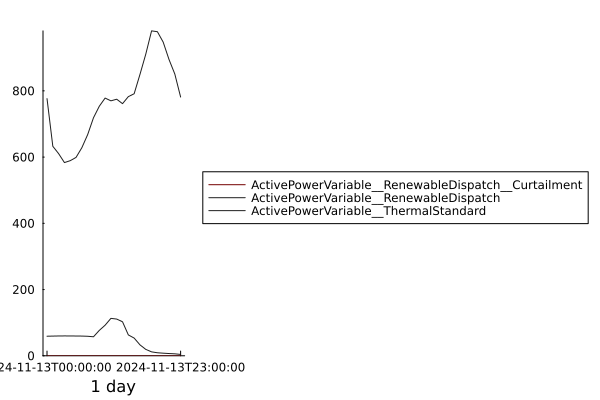

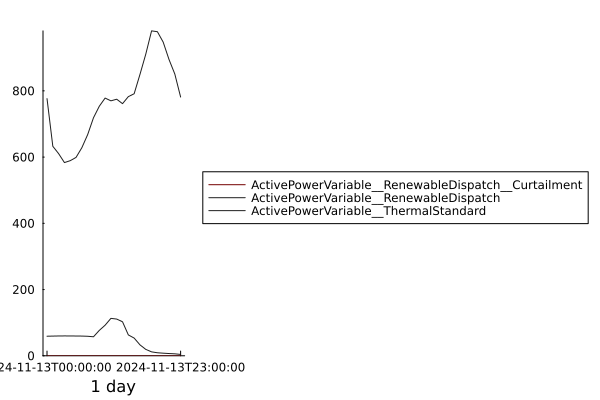

In [38]:
gen = get_generation_data(res)
plot_powerdata(gen)